In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
# Load the Iris dataset
iris = load_iris()

# Convert the data to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
df['target'] = iris.target

# Display the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
new_df = df[df['target'] != 0][['sepal length (cm)','sepal width (cm)','target']]

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

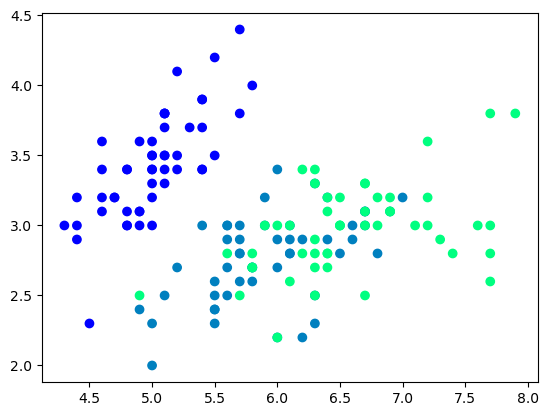

In [8]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['target'],cmap='winter')

In [9]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
2,4.7,3.2,1.3,0.2,0
47,4.6,3.2,1.4,0.2,0
44,5.1,3.8,1.9,0.4,0
34,4.9,3.1,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
11,4.8,3.4,1.6,0.2,0
40,5.0,3.5,1.3,0.3,0
20,5.4,3.4,1.7,0.2,0
27,5.2,3.5,1.5,0.2,0
51,6.4,3.2,4.5,1.5,1


In [10]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [11]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [12]:
y_test

array([2, 2, 2, 1, 0])

# Case 1 - Bagging

In [13]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
115,6.4,3.2,5.3,2.3,2
6,4.6,3.4,1.4,0.3,0
56,6.3,3.3,4.7,1.6,1
115,6.4,3.2,5.3,2.3,2
6,4.6,3.4,1.4,0.3,0
42,4.4,3.2,1.3,0.2,0
123,6.3,2.7,4.9,1.8,2
42,4.4,3.2,1.3,0.2,0


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [15]:
dt_bag1 = DecisionTreeClassifier()

In [16]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

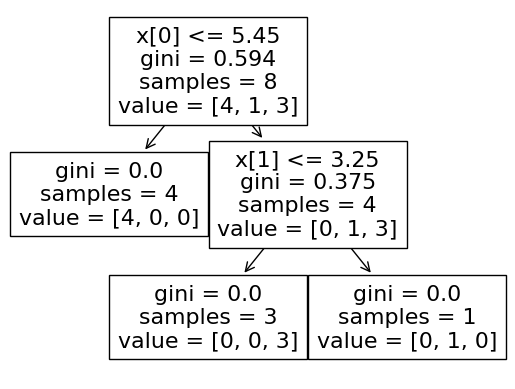

D:\New folder\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\New folder\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


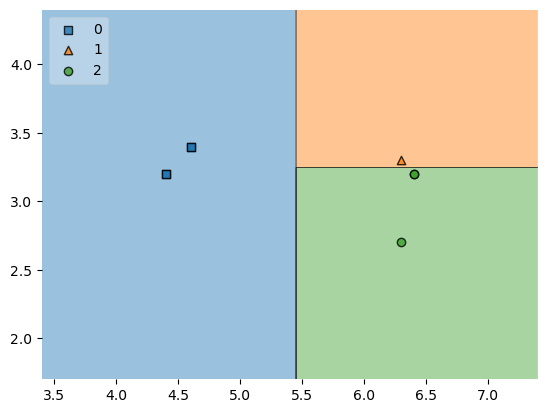

In [17]:
evaluate(dt_bag1,X,y)

In [18]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
56,6.3,3.3,4.7,1.6,1
123,6.3,2.7,4.9,1.8,2
42,4.4,3.2,1.3,0.2,0
123,6.3,2.7,4.9,1.8,2
131,7.9,3.8,6.4,2.0,2
20,5.4,3.4,1.7,0.2,0
4,5.0,3.6,1.4,0.2,0
123,6.3,2.7,4.9,1.8,2


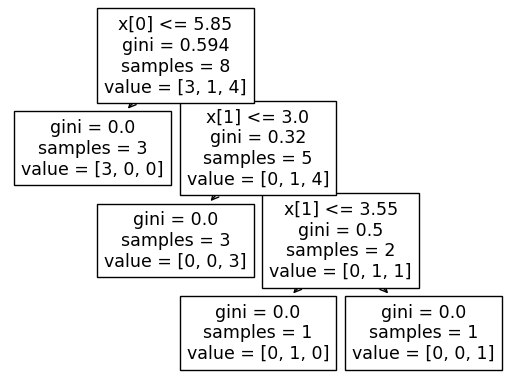

0.8


D:\New folder\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\New folder\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


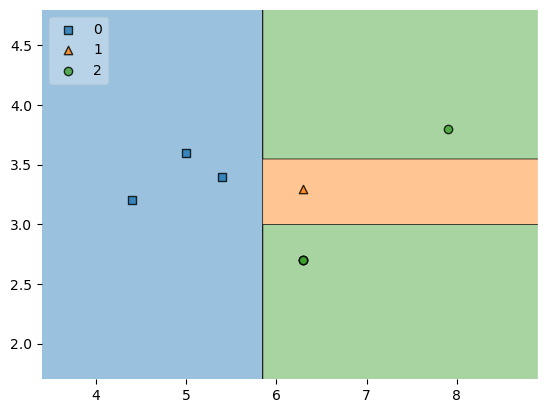

In [19]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [20]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
42,4.4,3.2,1.3,0.2,0
42,4.4,3.2,1.3,0.2,0
126,6.2,2.8,4.8,1.8,2
56,6.3,3.3,4.7,1.6,1
20,5.4,3.4,1.7,0.2,0
131,7.9,3.8,6.4,2.0,2
131,7.9,3.8,6.4,2.0,2
131,7.9,3.8,6.4,2.0,2


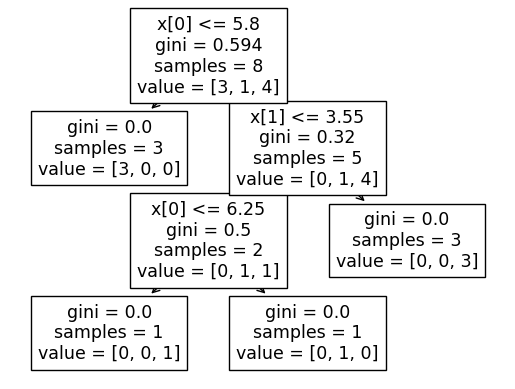

0.6


D:\New folder\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\New folder\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


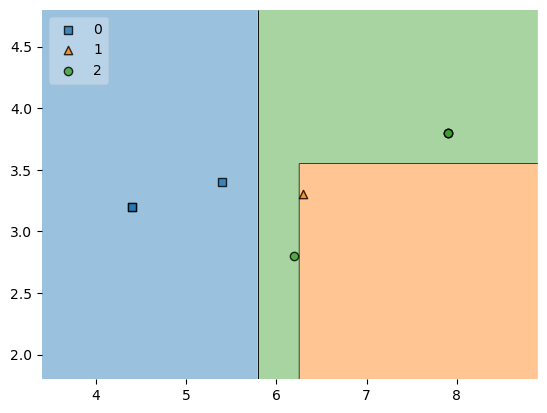

In [21]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [22]:
df_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
84,5.4,3.0,4.5,1.5,1
69,5.6,2.5,3.9,1.1,1
135,7.7,3.0,6.1,2.3,2
91,6.1,3.0,4.6,1.4,1
51,6.4,3.2,4.5,1.5,1


In [23]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [0]
Predictor 2 [0]
Predictor 3 [0]


D:\New folder\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\New folder\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\New folder\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [24]:
# Row sampling without replacement
df_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
123,6.3,2.7,4.9,1.8,2
131,7.9,3.8,6.4,2.0,2
115,6.4,3.2,5.3,2.3,2
42,4.4,3.2,1.3,0.2,0
126,6.2,2.8,4.8,1.8,2
19,5.1,3.8,1.5,0.3,0
6,4.6,3.4,1.4,0.3,0
56,6.3,3.3,4.7,1.6,1
4,5.0,3.6,1.4,0.2,0
20,5.4,3.4,1.7,0.2,0


In [25]:
df_train.sample(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
131,7.9,3.8,6.4,2.0,2
19,5.1,3.8,1.5,0.3,0
6,4.6,3.4,1.4,0.3,0
4,5.0,3.6,1.4,0.2,0
123,6.3,2.7,4.9,1.8,2
115,6.4,3.2,5.3,2.3,2
20,5.4,3.4,1.7,0.2,0
56,6.3,3.3,4.7,1.6,1


# Random Subspaces

In [27]:
df = df.sample(10)

In [28]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
82,5.8,2.7,3.9,1.2,1
91,6.1,3.0,4.6,1.4,1
43,5.0,3.5,1.6,0.6,0
128,6.4,2.8,5.6,2.1,2
86,6.7,3.1,4.7,1.5,1
72,6.3,2.5,4.9,1.5,1
36,5.5,3.5,1.3,0.2,0
145,6.7,3.0,5.2,2.3,2
59,5.2,2.7,3.9,1.4,1
64,5.6,2.9,3.6,1.3,1


In [31]:
df.sample(2,replace=True,axis=1)

,sepal width (cm),sepal width (cm)
82,2.7,2.7
91,3.0,3.0
43,3.5,3.5
128,2.8,2.8
86,3.1,3.1
72,2.5,2.5
36,3.5,3.5
145,3.0,3.0
59,2.7,2.7
64,2.9,2.9


# Random Patches

In [32]:
df.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal length (cm),petal width (cm)
64,5.6,1.3
128,6.4,2.1
43,5.0,0.6
72,6.3,1.5
64,5.6,1.3
36,5.5,0.2
82,5.8,1.2
72,6.3,1.5
